In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [41]:
df = pd.read_csv(r"Customer Seg.csv")

In [42]:
df.head()

,Customer ID,Oreders Count,Total Spend,Avg Rating,Payment Method
0,93,56,23281627.50,2,paypal
1,212,73,22698255.75,2,paypal
2,182,53,22131059.76,3,paypal
3,78,62,21689380.76,3,paypal
4,219,58,21465009.84,3,paypal


In [43]:
df.duplicated().sum()

0

In [44]:
df.isnull().sum()

Customer ID       0
Oreders Count     0
Total Spend       1
Avg Rating        0
Payment Method    2
dtype: int64

In [45]:
df.dropna(how='any', inplace=True)

In [46]:
encoder = LabelEncoder()
df['Payment Method'] = encoder.fit_transform(df['Payment Method'])

In [47]:
features = df[['Oreders Count', 'Total Spend', 'Avg Rating', 'Payment Method']]

In [48]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [49]:
# Use the elbow method to find the best number of clusters
inertia = []
k_range = range(2, 10)
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_features)
    inertia.append(model.inertia_)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

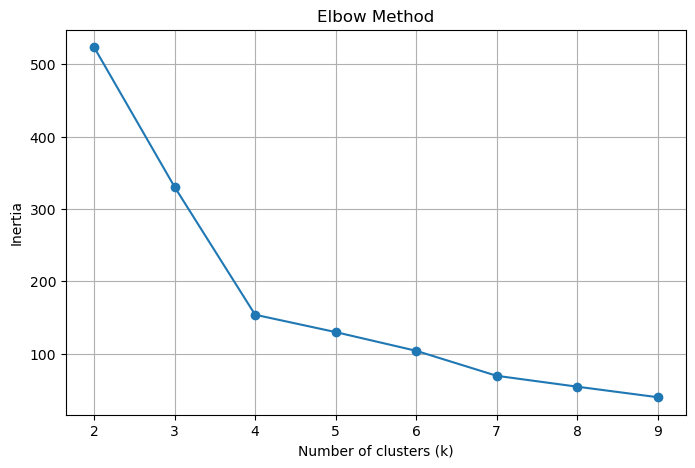

In [50]:
# Plot elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [51]:
# Evaluate silhouette scores for each k
silhouette_scores = []
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)
    print(f"k={k}, silhouette_score={score:.3f}")

k=2, silhouette_score=0.600
k=3, silhouette_score=0.598
k=4, silhouette_score=0.651
k=5, silhouette_score=0.656
k=6, silhouette_score=0.581
k=7, silhouette_score=0.620
k=8, silhouette_score=0.526
k=9, silhouette_score=0.534


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

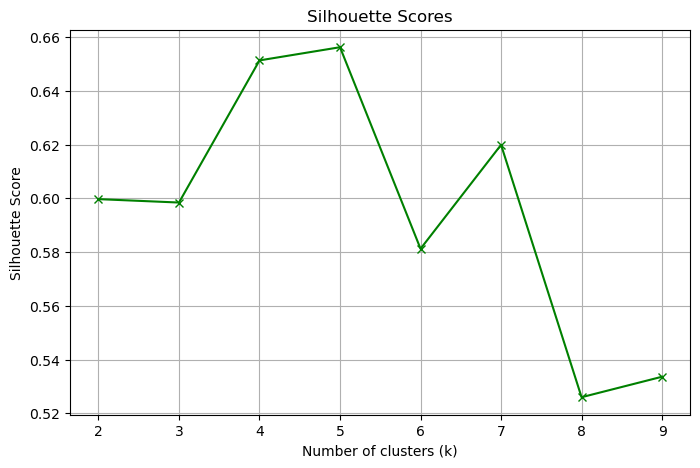

In [52]:
# Plot silhouette scores
plt.figure(figsize=(8,5))
plt.plot(k_range, silhouette_scores, marker='x', color='green')
plt.title("Silhouette Scores")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [53]:
# Fit final model with selected number of clusters
optimal_k = 4 
final_model = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = final_model.fit_predict(scaled_features)


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [54]:

# Add cluster labels to the original data
df['Cluster'] = clusters
cluster_names = {
    0: "Loyal Premium Customers",
    1: "At-Risk / Low-Value Users",
    2: "High-Spenders with High Rating",
    3: "Frequent but Low-Spend Buyers"
}
df['Cluster Name'] = df['Cluster'].map(cluster_names)

In [55]:
cluster_summary = df.groupby('Cluster Name')[['Oreders Count', 'Total Spend', 'Avg Rating']].mean()
print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
                                 Oreders Count   Total Spend  Avg Rating
Cluster Name                                                           
At-Risk / Low-Value Users            4.583333  3.660162e+05    2.444444
Frequent but Low-Spend Buyers        2.833333  2.487868e+05    2.500000
High-Spenders with High Rating      50.376147  1.484993e+07    3.000000
Loyal Premium Customers             49.549451  1.432798e+07    2.000000


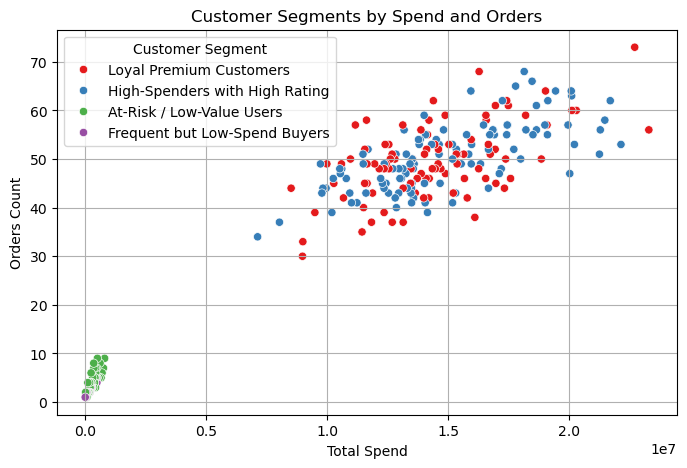

In [56]:
# 2D scatter plot with labels
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Total Spend', y='Oreders Count', hue='Cluster Name', palette='Set1')
plt.title("Customer Segments by Spend and Orders")
plt.xlabel("Total Spend")
plt.ylabel("Orders Count")
plt.grid(True)
plt.legend(title="Customer Segment")
plt.show()

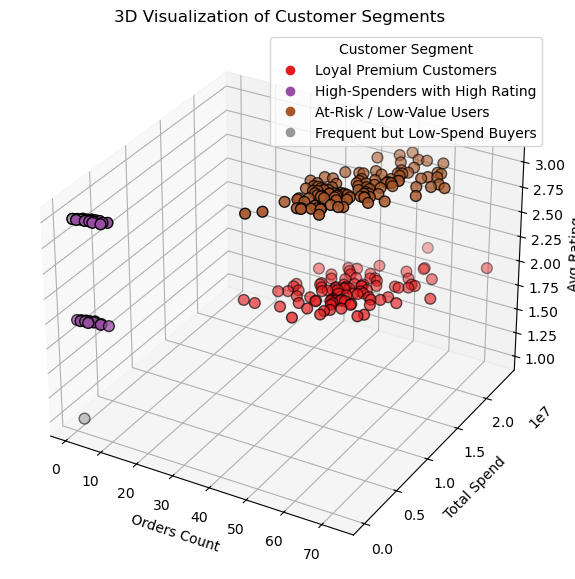

In [57]:
# 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Assign numeric colors to cluster names for 3D plot
cluster_to_color = {name: i for i, name in enumerate(cluster_names.values())}
colors = df['Cluster Name'].map(cluster_to_color)

scatter = ax.scatter(
    df['Oreders Count'],
    df['Total Spend'],
    df['Avg Rating'],
    c=colors,
    cmap='Set1',
    s=60,
    edgecolor='k'
)

ax.set_xlabel('Orders Count')
ax.set_ylabel('Total Spend')
ax.set_zlabel('Avg Rating')
ax.set_title('3D Visualization of Customer Segments')

# Legend
unique_names = df['Cluster Name'].unique()
legend_labels = [name for name in unique_names]
handles, _ = scatter.legend_elements()
ax.legend(handles, legend_labels, title="Customer Segment")

plt.show()

In [58]:
import joblib
joblib.dump(final_model, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']